In [32]:
import pandas as pd

dataset = 'CnDARIO'

if dataset == 'CnDARIO':
    df_path = '../result/vis/freq_gap_cn_novel_5billion.csv'
elif dataset == 'Grover':
    df_path = '../result/vis/freq_gap_en_grover.csv'
elif dataset == 'Writing Prompt':
    df_path = '../result/vis/freq_gap_en_writing_prompt.csv'

freq_df = pd.read_csv(df_path)
# freq_df = freq_df[freq_df['value'] != 0.0]
#freq_gap_df['index'] = freq_gap_df.index
print(freq_df)

      char        value     value_label  index
0        ，  75658.00000         ai_freq      0
1        ，  83366.00000      human_freq      0
2        ，     -0.10188  freq_ratio_gap      0
3        ，      0.10188  freq_gap_score      0
4        的  35523.00000         ai_freq      1
...    ...          ...             ...    ...
17559    俐      0.00000  freq_gap_score   4793
17560    蚱      1.00000         ai_freq   4794
17561    蚱      1.00000      human_freq   4794
17562    蚱      0.00000  freq_ratio_gap   4794
17563    蚱      0.00000  freq_gap_score   4794

[17564 rows x 4 columns]


/home/iamlxb3/anaconda3/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/iamlxb3/anaconda3/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/iamlxb3/anaconda3/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

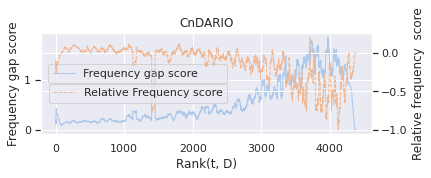

In [33]:
import pdb
import seaborn as sns
import matplotlib.pyplot as plt


freq_gap_score_ma_df = freq_df[freq_df['value_label'].isin({'freq_gap_score'})]
freq_gap_score_ma_df['value'] = freq_gap_score_ma_df['value'].rolling(window=50, min_periods=1).mean()
freq_gap_score_ma_df['value_label'] = 'absolute gap score'
freq_gap_score_ma_df = freq_gap_score_ma_df.reset_index()
freq_gap_score_ma_df['index'] = freq_gap_score_ma_df.index

freq_gap_ratio_ma_df = freq_df[freq_df['value_label'].isin({'freq_ratio_gap'})]
freq_gap_ratio_ma_df['value'] = freq_gap_ratio_ma_df['value'].rolling(window=50, min_periods=1).mean()
freq_gap_ratio_ma_df['value_label'] = 'relative score to AI'
freq_gap_ratio_ma_df = freq_gap_ratio_ma_df.reset_index()
freq_gap_ratio_ma_df['index'] = freq_gap_ratio_ma_df.index


# plot_dfplot_df = pd.concat([freq_gap_score_ma_df, freq_gap_ratio_ma_df])

# # plot_df = pd.concat([freq_gap_df, freq_gap_score_ma_df])
sns.set(rc={'figure.figsize':(6.4, 2.5)})
# #print(plot_df)

# freq_gap_df['freq_ratio_gap_MA'] = freq_gap_df['freq_ratio_gap'].rolling(window=100).mean()
# freq_gap_df['freq_gap_score_MA'] = freq_gap_df['freq_gap_score'].rolling(window=500).mean()
# fig, ax = plt.subplots(3, 2, sharex=True)
ax1 = sns.lineplot(data=freq_gap_score_ma_df, x="index", y="value", color='#ACC9EB', linewidth=1)
ax2 = ax1.twinx()
sns.lineplot(data=freq_gap_ratio_ma_df, x="index", y="value", ax=ax2, color='#EFB793', linewidth=1)
ax2.set(ylabel='Relative frequency  score', title=dataset)
ax2.lines[0].set_linestyle("--")
# ax1.set_title("The difference between the frequency of chars used in AI and human writing")
# ax1.set(xlabel='The rank of char frequency', ylabel='Frequency gap score')
ax1.set(xlabel='Rank(t, D)', ylabel='Frequency gap score')
#print(legend_labels)
if dataset == 'CnDARIO':
    ax1.legend(bbox_to_anchor=(0.58, 0.45), labels=['Frequency gap score       '])
    ax2.legend(bbox_to_anchor=(0.58, 0.55), labels=['Relative Frequency score'])
plt.tight_layout()
plt.savefig(f'/home/iamlxb3/temp_rsync_dir/story_turing_test/vis/method_frequency_diff_subfig_{dataset}.pdf')
plt.show()

Index(['repeat_i', 'is_change_apply_to_test', 'is_change_apply_to_train',
       'classifier_name', 'dataset_name', 'semantic_change', 'char_freq_range',
       'test_acc', 'test_f1', 'train_loss', 'test_loss', 'train_size',
       'val_size', 'test_size', 'kept_char_ratio', 'text_origin_len',
       'text_valid_len'],
      dtype='object')
{10: 0.00011629935453858232, 20: 0.00023259870907716464, 40: 0.0004651974181543293, 80: 0.0009303948363086584, 160: 0.0018607896726173172, 320: 0.0037215793452346343}
(180, 17)


/home/iamlxb3/anaconda3/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[Text(0, 0, '10\n(0.00012)'), Text(1, 0, '20\n(0.00023)'), Text(2, 0, '40\n(0.00047)'), Text(3, 0, '80\n(0.00093)'), Text(4, 0, '160\n(0.00186)'), Text(5, 0, '320\n(0.00372)')]


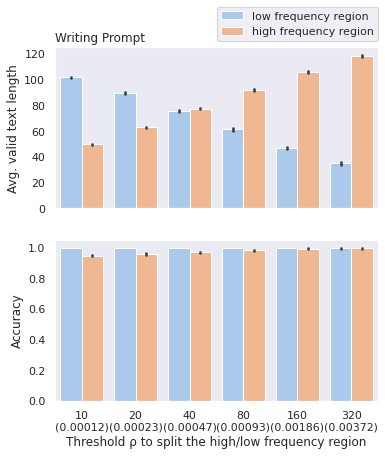

In [52]:
# df_path = '../result/vis/char_range_seq_length.csv'
# char_range_seq_len_df = pd.read_csv(df_path)
# #print(char_range_seq_len_df)
# print(sorted(set(char_range_seq_len_df['char_index'])))
# # print(char_range_seq_len_df)
# char_index_thresh = 2000
# avg_text_length = 103
# # human_text_avg_len = char_range_seq_len_df[(char_range_seq_len_df['value_label']=='human') & (char_range_seq_len_df['char_index']==5606) & (char_range_seq_len_df['type']=='use_top')]['value'].mean()
# # ai_text_avg_len = char_range_seq_len_df[(char_range_seq_len_df['value_label']=='ai') & (char_range_seq_len_df['char_index']==5606) & (char_range_seq_len_df['type']=='use_top')]['value'].mean()

# print(f"human_text_avg_len: {human_text_avg_len}, ai_text_avg_len: {ai_text_avg_len}")

# def tmp_func(x):
#     if x == 'tail freq':
#         return 'low frequency region'
#     elif x == 'top freq':
#         return 'high frequency region'
# char_range_seq_len_df['type'] = char_range_seq_len_df['type'].apply(tmp_func)

# char_range_seq_len_df_top = char_range_seq_len_df[char_range_seq_len_df['type']=='high frequency region']
# char_range_seq_len_df_top = char_range_seq_len_df_top[char_range_seq_len_df_top['char_index'] < char_index_thresh]

# char_range_seq_len_df_tail = char_range_seq_len_df[char_range_seq_len_df['type']=='low frequency region']
# char_range_seq_len_df_tail = char_range_seq_len_df_tail[char_range_seq_len_df_tail['char_index'] < char_index_thresh]

# import seaborn as sns
# import matplotlib.pyplot as plt

# plot_df = pd.concat([char_range_seq_len_df_top, char_range_seq_len_df_tail])

# # plt.subplots(nrows=2, figsize=(6.4, 7))
# sns.set(rc={'figure.figsize':(6.4, 3)})

# # , palette = [sns.color_palette("Set2", 10)[3] , sns.color_palette("Set2", 10)[9]]
# plot_df['Source'] = plot_df['value_label']
# plot_df['Char region'] = plot_df['type']
# ax = sns.lineplot(x="char_index", y="value", data=plot_df, hue='Source', ci='sd', style='Char region')
# ax.axhline(avg_text_length, ls='--', color='red', linewidth=1)

# ax.scatter(16, 28,  marker='o',    s=15, color='black')
# ax.scatter(32, 37,  marker='o',    s=15, color='black')
# ax.scatter(64, 48,  marker='o',    s=15, color='black')
# ax.scatter(128, 60, marker='o',    s=15, color='black')
# ax.scatter(256, 72, marker='o',    s=15, color='black')
# ax.scatter(512, 84, marker='o',    s=15, color='black')
# ax.scatter(1024, 94.4, marker='o', s=15, color='black')

# ax.scatter(16, 75,  marker='x',    s=15, color='black')
# ax.scatter(32, 66,  marker='x',    s=15, color='black')
# ax.scatter(64, 55,  marker='x',    s=15, color='black')
# ax.scatter(128, 43, marker='x',    s=15, color='black')
# ax.scatter(256, 31, marker='x',    s=15, color='black')
# ax.scatter(512, 19, marker='x',    s=15, color='black')
# ax.scatter(1024,9.49, marker='x',  s=15, color='black')

# # ax.set_title("How eliminating chars based on frequency rank affects valid text length")
# ax.set(xlabel='Rank(c, D)', ylabel='Length of valid text')
# # ax.set(xticklabels=[])
# # ax.set(xlabel=None)

# # import pdb
# # pdb.set_trace()
# annotate_lines = ax.lines[:2] + [ax.lines[10]]
# for l in annotate_lines:
#     y = l.get_ydata()
#     if len(y)>0:
#         ax.annotate(f'{y[-1]:.2f}', xy=(1.01,y[-1]), xycoords=('axes fraction', 'data'), 
#                      ha='left', va='center', color=l.get_color())
        
# # ax.legend(bbox_to_anchor=(1.0, 1.04), loc=4, borderaxespad=0.)
# # ax.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
# plt.tight_layout()
# plt.savefig('exp_frequency_diff_subfig2.pdf')
# plt.show()

# sns.lineplot(x="char_index", y="value", data=plot_df, hue='value_label', ci='sd', style='type')
# plt.show()

# ------------------------------------------------------------------------------------------------------------------------------



import os
import pdb
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(5.8, 6.5),'axes.grid' : False})
# sns.set(font_scale = 1.1)

dataset_name = 'en_writing_prompt' # en_grover, en_writing_prompt, cn_novel_5billion
if dataset_name == 'cn_novel_5billion':
    show_dataset = 'CnDARIO'
elif dataset_name == 'en_grover':
    show_dataset = 'CNN/Daily Mail'
elif dataset_name == 'en_writing_prompt':
    show_dataset = 'Writing Prompt'
all_files = glob.glob(os.path.join('../result/', '*.csv'))
all_df = pd.concat([pd.read_csv(x) for x in all_files])
all_keys = all_df.keys()
print(all_keys)
df = all_df[(all_df['semantic_change'].isin({'rm_chars_in_freq', 'rm_chars_out_freq'})) & (all_df['dataset_name']==dataset_name)]
rm_out_freq_df = all_df[(all_df['semantic_change'].isin({'rm_chars_out_freq'})) & (all_df['dataset_name']==dataset_name)]
def tmp_func(x):
    if x == 'rm_chars_in_freq':
        return 'low frequency region'
    elif x == 'rm_chars_out_freq':
        return 'high frequency region'

df['semantic_change'] = df['semantic_change'].apply(tmp_func)
char_freq_range_dict = dict(zip(rm_out_freq_df['char_freq_range'], rm_out_freq_df['kept_char_ratio']))
print(char_freq_range_dict)
char_freq_range_dict = {k:v for k,v in char_freq_range_dict.items()}
print(df.shape)
# print(df)

plot_df = pd.DataFrame(df)
# pastel

fig, axs = plt.subplots(nrows=2)

        
ax0 = sns.barplot(data=plot_df, x="char_freq_range", y="text_valid_len", hue="semantic_change", palette = 'pastel', ax = axs[0])
ax1 = sns.barplot(data=plot_df, x="char_freq_range", y="test_acc", hue="semantic_change", palette = 'pastel', ax = axs[1])


ax1_labels = ax1.xaxis.get_ticklabels()
ax1.set_xticks(range(len(ax1_labels))) # <--- set the ticks first
ax1.set_xticklabels([f'{x.get_text()}\n({char_freq_range_dict[int(x.get_text())]:.5f})' for x in ax1_labels])
print(ax1_labels)
# if dataset_name == 'cn_novel_5billion':
#     ax1.axhline(0.95, ls='--', color='red', linewidth=1)

# annotate_lines = ax.lines[14:]
# for l in annotate_lines:
#     y = l.get_ydata()d
#     if len(y)>0:
#         ax.annotate(f'{y[-1]:.2f}', xy=(1.01,y[-1]), xycoords=('axes fraction', 'data'), 
#                      ha='left', va='center', color=l.get_color())
# ax.set(xlabel='The rank of char frequency', ylabel='Accuracy')

ax0.set(xlabel='Threshold ρ to split the high/low frequency region', ylabel='Avg. valid text length')
ax0.set_title(show_dataset,  x=0.14)
ax0.set(xticklabels=[])
ax0.set(xlabel=None)
ax1.set(xlabel='Threshold ρ to split the high/low frequency region', ylabel='Accuracy')

ax0.legend(bbox_to_anchor=(1.0, 1.04), loc=4, borderaxespad=0.)
ax1.legend([],[], frameon=False) # remove legend
#plt.title(dataset_name)
# ax1.legend(bbox_to_anchor=(1.0, 1.04), loc=4, borderaxespad=0.)
# ax.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
plt.savefig(f'../vis/high_low_frequency_{dataset_name}.pdf')
plt.show()